## Unit 1 Lesson 3 Project 6
# Challenge: Data cleaning & validation
<div style="text-align: right"> Ashley Simpson </div>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import scipy.stats

### Goals
> Determine the five most common journals and the total articles for each. 

> Calculate the mean, median, and standard deviation of the open-access cost per article for each journal. 

> *Bonus: Identify the open access prices paid by subject area.

In [123]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='latin1')
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [124]:
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       'COST (£) charged to Wellcome (inc VAT when charged)'],
      dtype='object')
(2127, 5)
PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object


,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,In Process,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [125]:
df.rename(columns={'PMID/PMCID':'PMID', 'Journal title': 'journal_title', 
                    'Article title': 'article_title', 'COST (£) charged to Wellcome (inc VAT when charged)': 'cost'}, inplace=True)

In [126]:
df['journal_title'].isnull().sum()

1

In [127]:
df['journal_title'].fillna('no_title')

0                                  Psychological Medicine
1                                       Biomacromolecules
2                                              J Med Chem
3                                              J Med Chem
4                                              J Org Chem
5                          Journal of Medicinal Chemistry
6                            Journal of Proteome Research
7                                               Mol Pharm
8                                    ACS Chemical Biology
9                                    ACS Chemical Biology
10           Journal of Chemical Information and Modeling
11                         Journal of Medicinal Chemistry
12                         Journal of Medicinal Chemistry
13                                           Biochemistry
14                         Journal of Medicinal Chemistry
15                                       Gastroenterology
16                        Journal of Biological Chemistry
17            

In [128]:
df.loc[:, 'Publisher'] = df['Publisher'].str.strip()
df.loc[:, 'journal_title'] = df['journal_title'].str.strip()
df.loc[:, 'article_title'] = df['article_title'].str.strip()
df.loc[:, 'cost'] = df['cost'].str.strip()

df['journal_title'].nunique()

951

In [129]:
df['Publisher'] = df['Publisher'].apply(lambda x: str(x).lower())
df['journal_title'] = df['journal_title'].apply(lambda x: str(x).lower())
df['article_title'] = df['article_title'].apply(lambda x: str(x).lower())

df.describe()

,PMID,Publisher,journal_title,article_title,cost
count,1928,2127,2127,2127,2127
unique,1880,254,895,2126,1402
top,In Process,elsevier,plos one,"exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,399,190,2,94


In [130]:
df['article_title'].count()

2127

In [131]:
df[df.duplicated('article_title', keep=False)]

,PMID,Publisher,journal_title,article_title,cost
1490,Pending,public library of science,plos one,"exclusive breastfeeding, diarrhoel morbidity a...",£825.68
1496,NaN,public library of science,plos one,"exclusive breastfeeding, diarrhoel morbidity a...",£825.68


In [132]:
df = df.drop_duplicates('article_title')

In [133]:
df['article_title'].count()

2126

### Determin the five most common journals and the total articles for each.

In [134]:
df['journal_title'].value_counts(dropna=False)[:5]

plos one                           189
journal of biological chemistry     53
neuroimage                          29
nucleic acids research              26
plos genetics                       24
Name: journal_title, dtype: int64

#### Below I'll begin to clean the cost data

In [135]:
df['cost'].isnull().values.any()

False

In [136]:
for column in df.columns: 
    #df[column] = df[column].str.strip() 
    #df[column] = df[column].str.lower()
    #df['cost'] = df['cost'].replace('[£$]', "") #remove dollar/pounds sign
    df['cost'] = df['cost'].map(lambda x: x.lstrip('£').rstrip('£')) #removes pound signs
    df['cost'] = df['cost'].map(lambda x: x.lstrip('$').rstrip('$')) #removes dollar signs
    df['cost'] = df['cost'].replace('[$£]?[.][0-9]{0,2}[$£]', "") #removes symbols & rounds to 2 decimals
    df['PMID'] = df['PMID'].str.replace('\s*', "") #removes whitespace / repeating patterns

In [137]:
df.head()

,PMID,Publisher,journal_title,article_title,cost
0,NaN,cup,psychological medicine,reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,acs,biomacromolecules,structural characterization of a model gram-ne...,2381.04
2,23043264PMC3506128,acs,j med chem,"fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330PMC3646402,acs,j med chem,orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216PMC3601604,acs,j org chem,regioselective opening of myo-inositol orthoes...,685.88


In [138]:
df.dtypes

PMID             object
Publisher        object
journal_title    object
article_title    object
cost             object
dtype: object

In [139]:
df['cost'] = df['cost'].astype('float').round(decimals=2)

Outliers need to be identified and removed

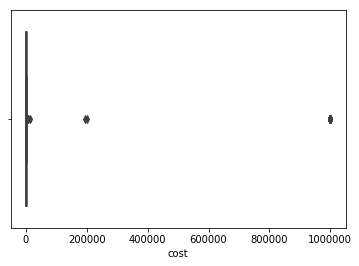

In [140]:
x = df['cost']
sns.boxplot(x)
plt.show()

In [141]:
df['cost'] = scipy.stats.mstats.winsorize(df['cost'], limits = 0.05)

#Removes outliers (winsorize)

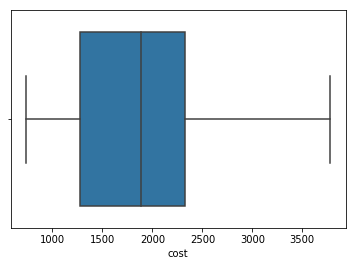

In [142]:
x = df['cost']
sns.boxplot(x)
plt.show()

#costs after removing outliers (winsorizing)

In [175]:
df['cost'].describe()

count    2126.000000
mean     1871.045033
std       771.624302
min       734.000000
25%      1280.000000
50%      1884.155000
75%      2321.342500
max      3780.000000
Name: cost, dtype: float64

### Calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [179]:
#lambda x:np.std(x)
#np.std(x, ddof=1)
#np.nanstd
df.groupby(['journal_title', 'article_title'])['cost'].agg(['mean', 'median', np.nanstd])  #.fillna(0)

mean  \
journal_title                                      article_title                                                 
academy of nutrition and dietetics                 parent support and parent mediated behaviours a...  2379.54   
acs chemical biology                               a novel allosteric inhibitor of the uridine dip...  1294.59   
                                                   chemical proteomic analysis reveals the drugabi...  1294.78   
                                                   discovery of ?2 adrenergic receptor ligands usi...   947.07   
                                                   discovery of an allosteric inhibitor binding si...  1267.76   
                                                   synthesis of alpha-glucan in mycobacteria invol...  2286.73   
acs chemical neuroscience                          continuous online microdialysis using microflui...  1186.80   
acs nano                                           hydroxy-terminated conjugated polymer nanoparti...   734.00   
                                                   skin dendritic cell targeting via microneedle a...   734.00   
acta crystallographica section d,  biological c... clustering procedures for the optimal selection...   771.42   
acta crystallographica section d: biological cr... intensity statistics in the presence of transla...   773.74   
acta crystallographica section f: structural bi... structure of diaminohydroxyphosphoribosylaminop...   785.60   
                                                   structure of pseudomonas aeruginosa inosine 5'-...   807.67   
acta crystallographica, section d                  nearest-cell: a fast and easy tool for locating...   757.18   
acta crystallography d                             crystallization, dehydration and experimental p...   774.19   
acta d                                             structure of hla-a*0301 in complex with a pepti...   750.16   
acta dermato venereologica                         the importance of a full clinical examination: ...   734.00   
acta diabetologica                                 a rare snp in pre-mir-34a is associated with in...  2336.28   
acta f                                             crystallization and preliminary crystallographi...   754.90   
acta neuropathol                                   overexpression of human wild-type fus causes pr...  1901.04   
acta neuropathologica                              insufficient opc migration into demyelinated le...  2250.97   
                                                   unravelling the enigma o selective vulnerabilit...  2348.21   
                                                   î±-synucleinopathy associated with g51d snca mu...  1884.01   
acta opthalmologica                                visual and psychological morbidity among patien...  2270.16   
acta physiol                                       integration of transient receptor potential can...  1991.50   
addiction                                          acute alcohol-related dysfunction as a predicto...  1919.51   
                                                   childhood conduct disorder trajectories, prior ...  2352.94   
advances in experimental medicine and biology      modelling cerebrovascular reactivity: a novel n...  1928.46   
                                                   normobaric hyperoxia does not change optical sc...  1928.46   
                                                   oscillations in cerebral haemodynamics in patie...  1928.46   
...                                                                                                        ...   
tropical animal health & production                low prevalence of bovine tuberculosis in somali...  2054.78   
tropical medicine and international health         disengagement from care in a decentralised prim...  1836.92   
                                                   epidemiology and control of trachoma: systamati...  1974.72   
  

### *Bonus: Identify the open access prices paid by subject area.

In [163]:
# assuming that subject area is to be understood as each journal title 
# (since each academic journal typically owns an area of expertise), we can use that 
# criterion to identify the open access prices paid by subject area:

df.groupby('journal_title').describe().head()

cost                       \
                                                   count      mean        std   
journal_title                                                                   
academy of nutrition and dietetics                   1.0  2379.540        NaN   
acs chemical biology                                 5.0  1418.186  507.30956   
acs chemical neuroscience                            1.0  1186.800        NaN   
acs nano                                             2.0   734.000    0.00000   
acta crystallographica section d,  biological c...   1.0   771.420        NaN   

                                                                               \
                                                        min      25%      50%   
journal_title                                                                   
academy of nutrition and dietetics                  2379.54  2379.54  2379.54   
acs chemical biology                                 947.07  1267.76  1294.59   
acs chemical neuroscience                           1186.80  1186.80  1186.80   
acs nano                                             734.00   734.00   734.00   
acta crystallographica section d,  biological c...   771.42   771.42   771.42   

                                                                      
                                                        75%      max  
journal_title                                                         
academy of nutrition and dietetics                  2379.54  2379.54  
acs chemical biology                                1294.78  2286.73  
acs chemical neuroscience                           1186.80  1186.80  
acs nano                                             734.00   734.00  
acta crystallographica section d,  biological c...   771.42   771.42